In [1]:
#Import libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img_width, img_height = 112, 112
batch_size = 32
epochs = 30

In [3]:
# Training Image preprocessing
train_datagen  = ImageDataGenerator(    
rescale=1./255, 
shear_range=0.2, 
zoom_range=0.2,                                                  
horizontal_flip=True,)   
training_set = train_datagen.flow_from_directory(
'train_G',target_size=(img_width, img_height),batch_size=batch_size,class_mode='categorical')



Found 2060 images belonging to 4 classes.


In [4]:
# validation Image preprocessing
val_datagen = ImageDataGenerator(
rescale=1./255)
val_set = val_datagen.flow_from_directory(
'val_G',target_size=(img_width, img_height),batch_size=batch_size,class_mode='categorical')

Found 220 images belonging to 4 classes.


In [6]:
# test Image preprocessing
test_datagen = ImageDataGenerator(
rescale=1./255)
test_set = test_datagen.flow_from_directory(
'test_G',target_size=(img_width, img_height),batch_size=batch_size,class_mode='categorical')

Found 220 images belonging to 4 classes.


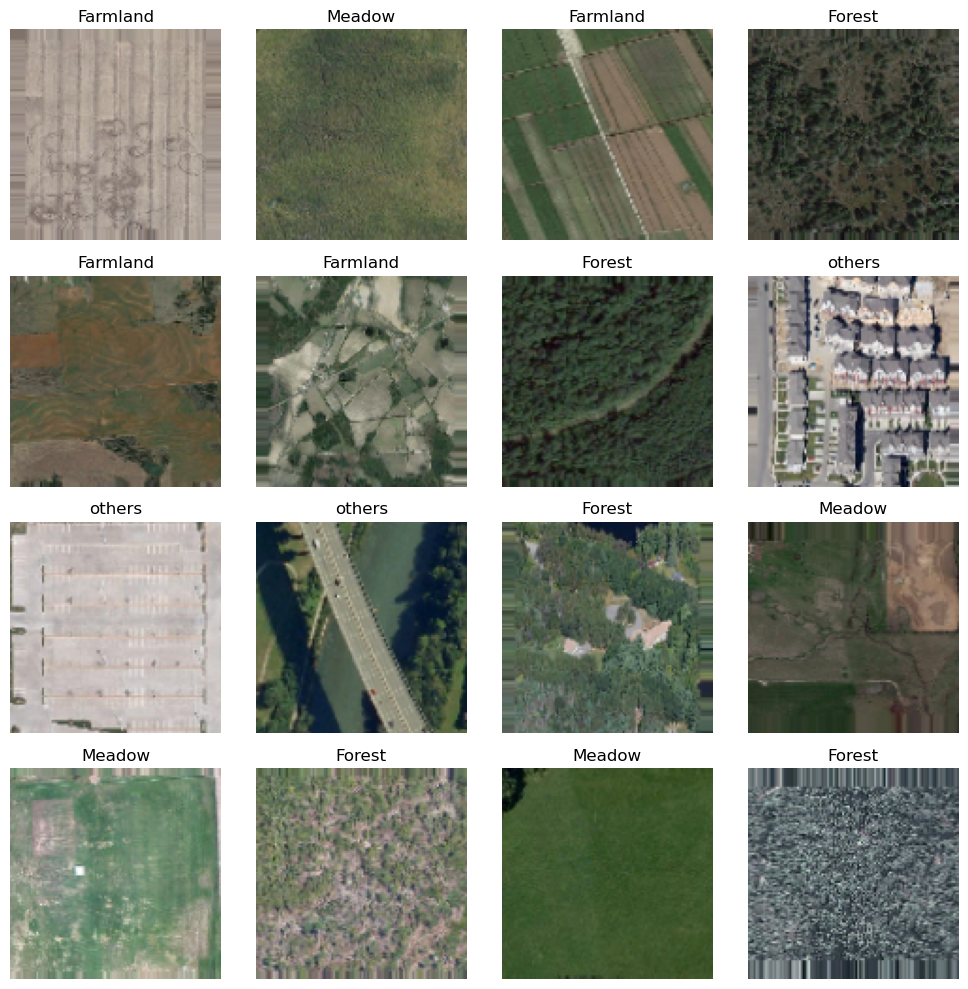

In [9]:
batch = next(training_set)
images = batch[0]
labels = batch[1]
class_names = list(test_set.class_indices.keys())
max_images = 16
plt.figure(figsize=(10, 10))
for i in range(min(len(images), max_images)):
    plt.subplot(4,4, i+1)
    plt.imshow(images[i])
    label_index = np.argmax(labels[i]) 
    plt.title(class_names[label_index])
    plt.axis("off")

plt.tight_layout()
plt.show()

In [10]:
input_shape = (img_width, img_height, 3)
print(f"Input image shape: {input_shape}")

# Define model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=input_shape, name='img_input'))

# Convolutional and maxpooling layers
model.add(layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same', name='convol_1'))   
model.add(layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same', name='convol_2')) 
model.add(layers.MaxPool2D(pool_size=2, strides=2, name='pool_1')) 
model.add(layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same', name='convol_3'))
model.add(layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same', name='convol_4'))
model.add(layers.MaxPool2D(pool_size=2, strides=2, name='pool_2'))
model.add(layers.Conv2D(filters=128, kernel_size=3, activation='relu', name='convol_5'))
model.add(layers.Conv2D(filters=128, kernel_size=3, activation='relu', name='convol_6'))

model.add(layers.Dropout(rate=0.5)) 

# Flatten layer
model.add(tf.keras.layers.Flatten())
# Dense layers
model.add(tf.keras.layers.Dense(units=1024, activation='relu'))

model.add(tf.keras.layers.Dense(units=4, activation='softmax'))

model.summary()

Input image shape: (112, 112, 3)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ convol_1 (Conv2D)               │ (None, 112, 112, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convol_2 (Conv2D)               │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool_1 (MaxPooling2D)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convol_3 (Conv2D)               │ (None, 56, 56, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convol_4 (Conv2D)               │ (None, 56, 56, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool_2 (MaxPooling2D)           │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convol_5 (Conv2D)               │ (None, 26, 26, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convol_6 (Conv2D)               │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 73728)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │    75,498,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         4,100 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 76,168,580 (290.56 MB)

 Trainable params: 76,168,580 (290.56 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x=training_set,validation_data=val_set,epochs=30) 

Epoch 1/30


C:\Users\Revotec\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


65/65 ━━━━━━━━━━━━━━━━━━━━ 411s 6s/step - accuracy: 0.4214 - loss: 1.1537 - val_accuracy: 0.7955 - val_loss: 0.5420
Epoch 2/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 401s 6s/step - accuracy: 0.7230 - loss: 0.7104 - val_accuracy: 0.7000 - val_loss: 0.7233
Epoch 3/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 387s 6s/step - accuracy: 0.7729 - loss: 0.5752 - val_accuracy: 0.8591 - val_loss: 0.4050
Epoch 4/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 389s 6s/step - accuracy: 0.8148 - loss: 0.4802 - val_accuracy: 0.8182 - val_loss: 0.5199
Epoch 5/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 383s 6s/step - accuracy: 0.7963 - loss: 0.5424 - val_accuracy: 0.7727 - val_loss: 0.6039
Epoch 6/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 385s 6s/step - accuracy: 0.7941 - loss: 0.5102 - val_accuracy: 0.8636 - val_loss: 0.3849
Epoch 7/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 388s 6s/step - accuracy: 0.7949 - loss: 0.4895 - val_accuracy: 0.8500 - val_loss: 0.4127
Epoch 8/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 391s 6s/step - accuracy: 0.8208 - loss: 0.4367 - val_accuracy: 0.8409 - val_loss: 0.

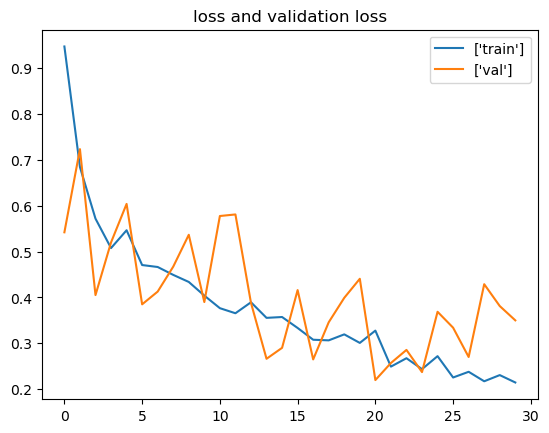

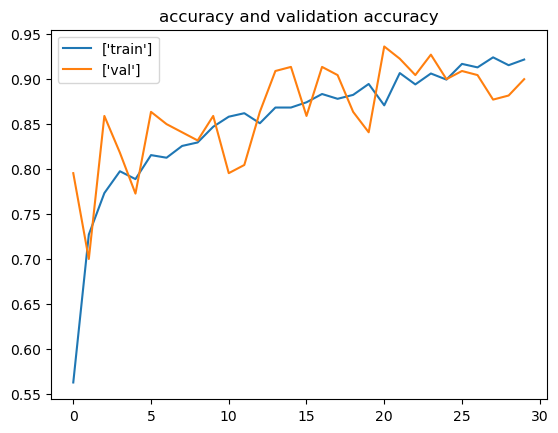

In [12]:
plt.plot(history.history['loss'], label=['train']) #loss de train
plt.plot(history.history['val_loss'], label=['val']) # loss de test
plt.title('loss and validation loss') # title
plt.legend()
plt.show()


plt.plot(history.history['accuracy'], label=['train']) #loss de train
plt.plot(history.history['val_accuracy'], label=['val']) # loss de test
plt.title('accuracy and validation accuracy') # title
plt.legend()
plt.show()

In [13]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_set)

7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 961ms/step - accuracy: 0.8947 - loss: 0.3414


In [39]:
model.save('DATA_Glob_2_CNN.h5')